In [49]:
from google.colab import drive
import pandas as pd
import random
import os
import time
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

import json
import pandas as pd
import seaborn as sns
import zipfile

import json
import shutil


In [50]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descompactando arquivos

Abaixo estamos utilizando a biblioteca zipfile para descompatar as imagens de um ATALHO criado da pasta do link abaixo:

https://drive.google.com/drive/folders/1xxm6ZjfsDSmv6C9JvbgiGrmHktrUjV5x

In [51]:
zip_path = '/content/drive/MyDrive/m10/animalpose_keypoint_new/images.zip'
extract_path = '/content/drive/MyDrive/m10/animal_images_1'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

annotations_path = os.path.join(extract_path, 'annotations')
images_path = os.path.join(extract_path, 'images')

# Carregando as anotações e dividindo o dataset entre bovinos e outras categorias

In [53]:
# Carregar anotações
annotations_path = '/content/drive/MyDrive/m10/animalpose_keypoint_new/keypoints.json'  # Atualize com o caminho correto se necessário
with open(annotations_path, 'r') as f:
    annotations_data = json.load(f)

# Extraindo dados das anotações
annotations = annotations_data['annotations']
categories = annotations_data['categories']
images_info = annotations_data['images']

# Caminhos das imagens
images_path = '/content/drive/MyDrive/m10/animal_images_1/images'  # Atualize com o caminho correto

# Verificar se as imagens existem no diretório
existing_images = set(os.listdir(images_path))

# Criar diretórios para bovinos e outros
bovines_dir = os.path.join(images_path, 'bovines')
others_dir = os.path.join(images_path, 'others')
os.makedirs(bovines_dir, exist_ok=True)
os.makedirs(others_dir, exist_ok=True)

# Mapear categorias para IDs
category_name_map = {category['id']: category['name'].lower().replace(" ", "_") for category in categories}
bovine_category_ids = {cat_id for cat_id, name in category_name_map.items() if 'cow' in name}

# Função para categorizar imagens com base nas anotações
def categorize_images(images_info, annotations, bovine_category_ids):
  image_id_to_category = {}
  for annotation in annotations:
    image_id = annotation['image_id']
    category_id = annotation['category_id']

    if category_id in bovine_category_ids:
      category_name = 'bovines'
    else:
      category_name = 'others'

    if image_id in image_id_to_category:
      image_id_to_category[image_id].add(category_name)
    else:
      image_id_to_category[image_id] = {category_name}

  return image_id_to_category

# Categorizar imagens
image_id_to_category = categorize_images(images_info, annotations, bovine_category_ids)

# Mover imagens para as respectivas pastas de categoria
for image_id, image_name in images_info.items():
  if image_name in existing_images:
    categories = image_id_to_category.get(int(image_id), set())

    for category in categories:
      src_path = os.path.join(images_path, image_name)
      dest_path = os.path.join(bovines_dir if 'bovines' in categories else others_dir, image_name)
      if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
      else:
        print(f"Imagem {src_path} não encontrada")

  else:
    print(f"Imagem {image_name} não existe no diretório {images_path}")

print("Imagens foram categorizadas com sucesso.")


Imagem /content/drive/MyDrive/m10/animal_images_1/images/2007_004537.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2007_005114.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2008_002686.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2009_001184.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2010_002763.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2010_004163.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2010_004436.jpg não encontrada
Imagem /content/drive/MyDrive/m10/animal_images_1/images/2011_001805.jpg não encontrada
Imagens foram categorizadas com sucesso.


# Análise exploratória

Breve análise exploratória entendendo a distribuição do dataset

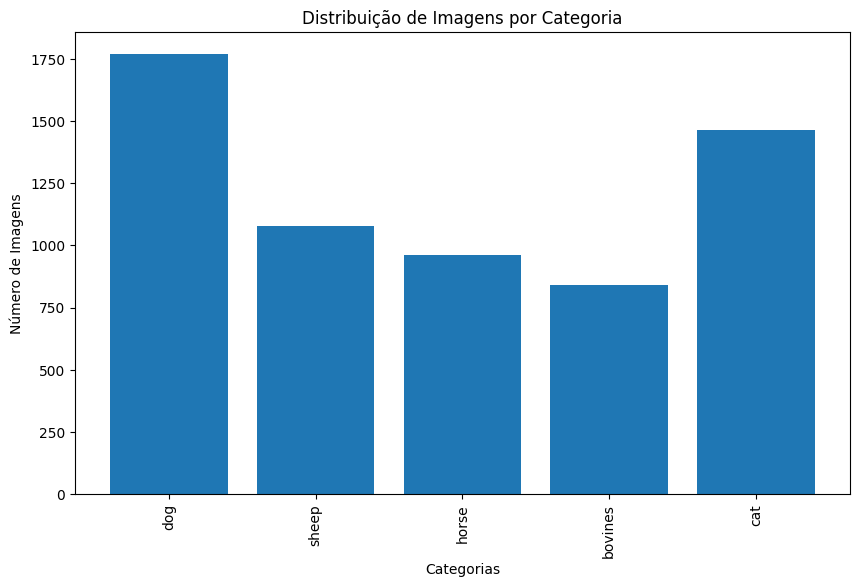

In [54]:
# Mapear categorias para IDs
category_name_map = {category['id']: category['name'].lower().replace(" ", "_") for category in categories}
bovine_category_ids = {cat_id for cat_id, name in category_name_map.items() if 'cow' in name}

# Distribuição de quantidade de imagens por categoria
category_count = {}
for annotation in annotations:
    category_id = annotation['category_id']
    category_name = 'bovines' if category_id in bovine_category_ids else category_name_map[category_id]
    if category_name in category_count:
        category_count[category_name] += 1
    else:
        category_count[category_name] = 1

# Plotar distribuição de quantidade de imagens por categoria
plt.figure(figsize=(10, 6))
plt.bar(category_count.keys(), category_count.values())
plt.xlabel('Categorias')
plt.ylabel('Número de Imagens')
plt.title('Distribuição de Imagens por Categoria')
plt.xticks(rotation=90)
plt.show()


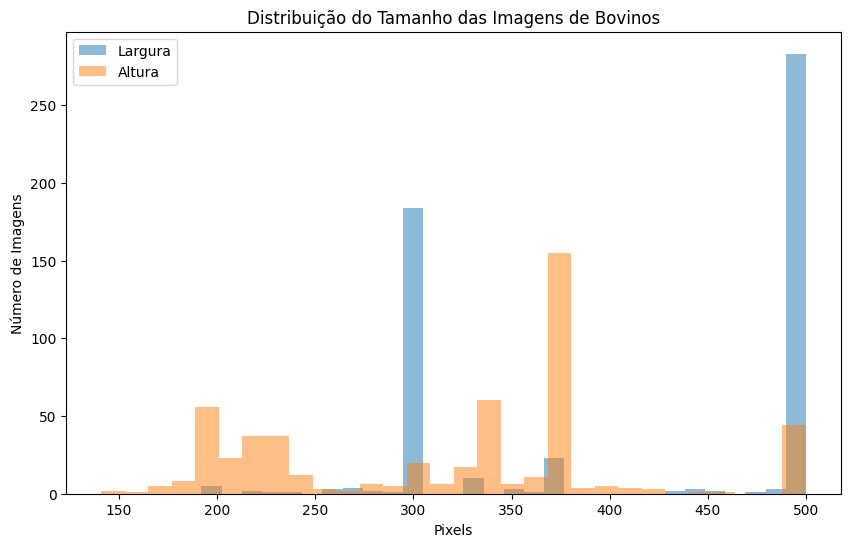

O tamanho mais comum entre as imagens de bovinos é: [500 375] com 145 imagens


In [55]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Caminhos das imagens
bovines_path = '/content/drive/MyDrive/m10/animal_images_1/images/bovines'  # Atualize com o caminho correto

# Verificar se as imagens existem no diretório de bovinos
bovine_images = set(os.listdir(bovines_path))

# Tamanho de imagens de bovinos
bovine_image_sizes = []
for image_name in bovine_images:
    image_path = os.path.join(bovines_path, image_name)
    with Image.open(image_path) as img:
        bovine_image_sizes.append(img.size)

# Converter lista de tamanhos para numpy array
bovine_image_sizes_np = np.array(bovine_image_sizes)

# Distribuição do tamanho das imagens de bovinos
plt.figure(figsize=(10, 6))
plt.hist(bovine_image_sizes_np[:, 0], bins=30, alpha=0.5, label='Largura')
plt.hist(bovine_image_sizes_np[:, 1], bins=30, alpha=0.5, label='Altura')
plt.xlabel('Pixels')
plt.ylabel('Número de Imagens')
plt.title('Distribuição do Tamanho das Imagens de Bovinos')
plt.legend()
plt.show()

# Tamanho mais comum
unique_bovine_sizes, counts = np.unique(bovine_image_sizes_np, axis=0, return_counts=True)
most_common_bovine_size = unique_bovine_sizes[np.argmax(counts)]
print(f"O tamanho mais comum entre as imagens de bovinos é: {most_common_bovine_size} com {counts.max()} imagens")


# Aplicando o modelo de pose estimation

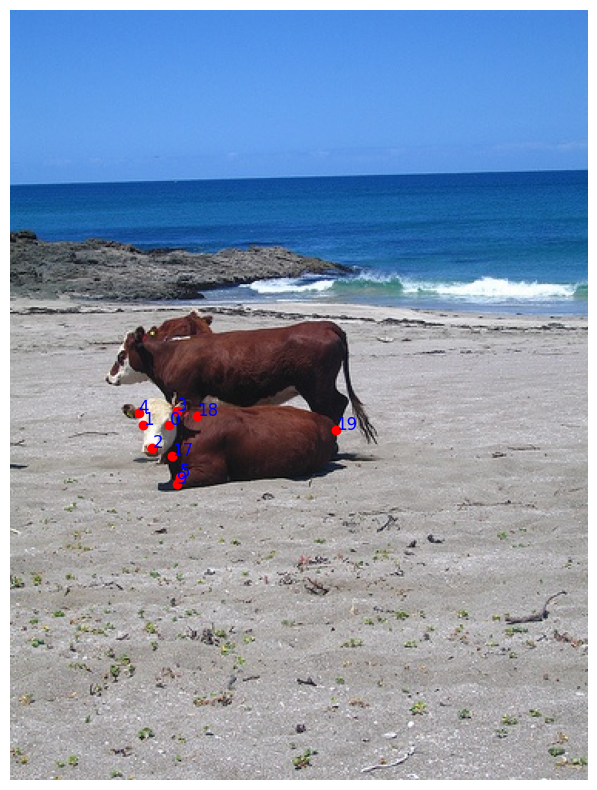

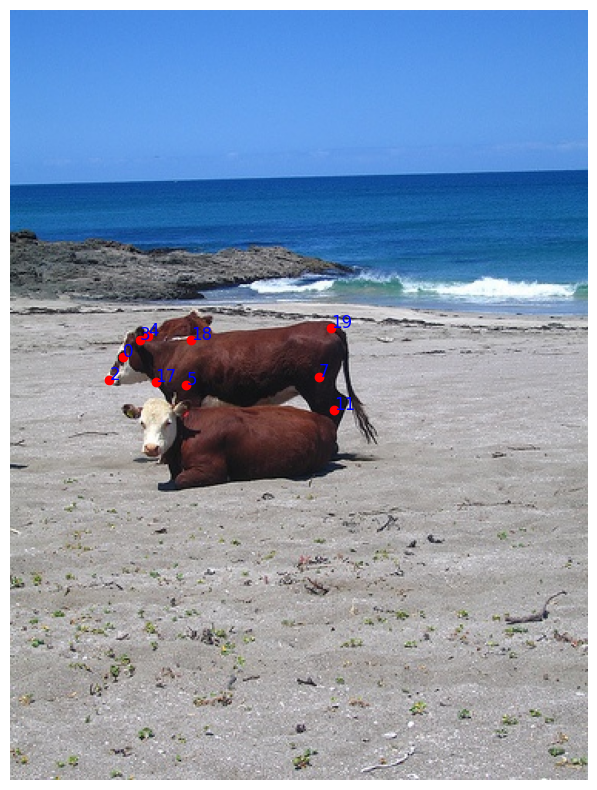

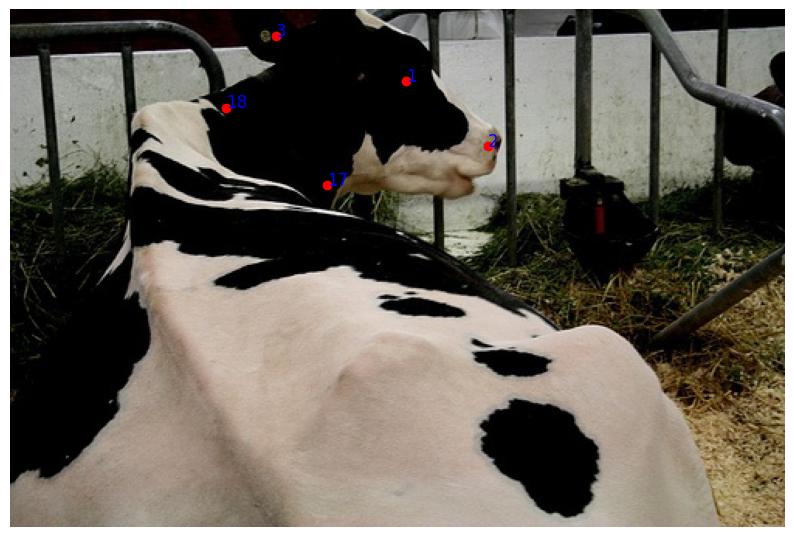

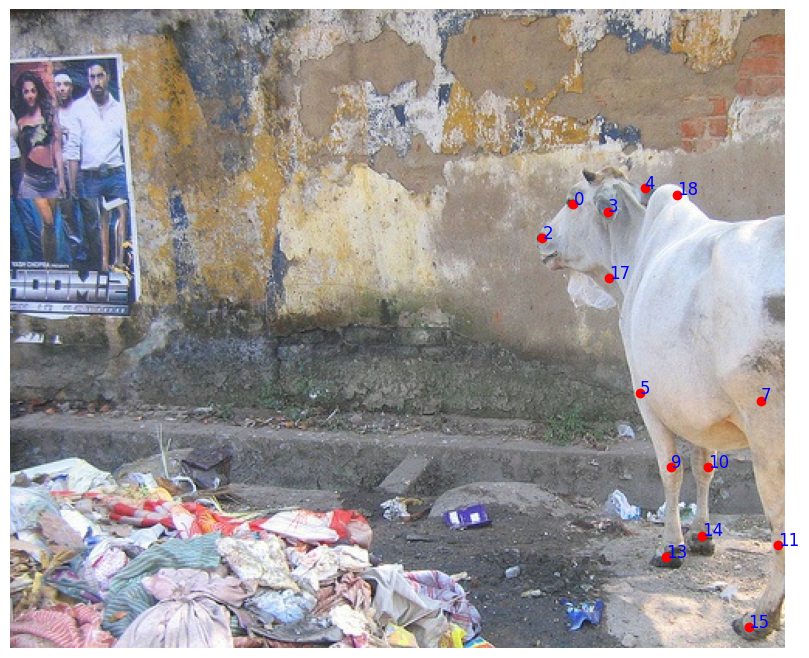

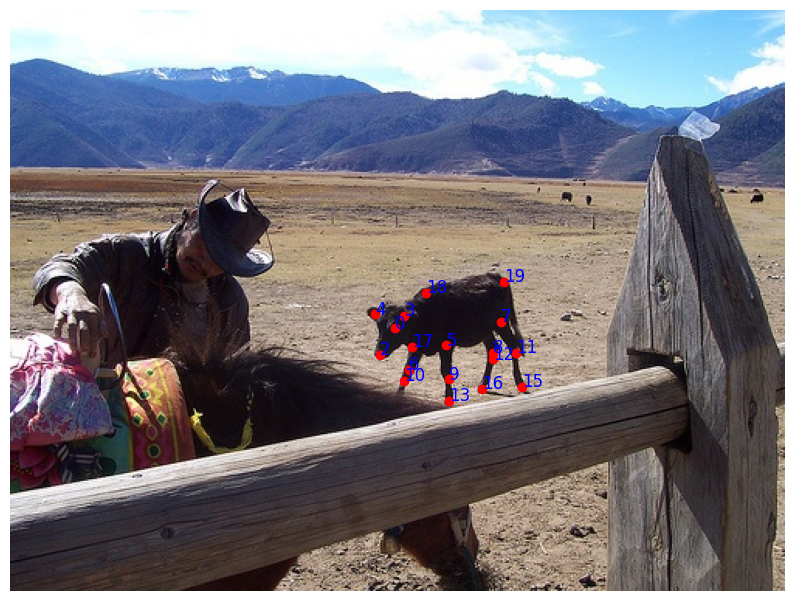

In [59]:
# Mapear nomes de categorias para IDs
category_name_map = {category['id']: category['name'].lower().replace(" ", "_") for category in categories}
bovine_category_ids = {cat_id for cat_id, name in category_name_map.items() if 'cow' in name}

# Filtrar anotações para bovinos
bovine_annotations = [ann for ann in annotations if ann['category_id'] in bovine_category_ids]

# Definir uma função para plotar keypoints em uma imagem
def plot_keypoints(image_path, keypoints, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    img = Image.open(image_path)
    ax.imshow(img)

    # Keypoints são fornecidos como [x1, y1, v1, x2, y2, v2, ..., xk, yk, vk]
    # onde (xi, yi) é a coordenada do keypoint e vi é a flag de visibilidade
    keypoints = np.array(keypoints).reshape(-1, 3)
    for i, (x, y, v) in enumerate(keypoints):
        if v > 0:  # se o keypoint é visível
            ax.plot(x, y, 'ro')  # plotar ponto vermelho
            ax.text(x, y, str(i), color='blue', fontsize=12)  # adicionar texto com índice do keypoint

    ax.axis('off')  # desativar os eixos

# Plotar keypoints em algumas imagens de bovinos
bovines_path = '/content/drive/MyDrive/m10/animal_images_1/images/bovines'  # Atualize com o caminho correto

for i, ann in enumerate(bovine_annotations[:5]):  # Mostrar as primeiras 5 imagens de bovinos
    image_id = ann['image_id']
    keypoints = ann['keypoints']
    image_name = images_info[str(image_id)]
    image_path = os.path.join(bovines_path, image_name)

    fig, ax = plt.subplots(figsize=(10, 10))
    plot_keypoints(image_path, keypoints, ax)
    plt.show()
